# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [ ]:
# Please include your imports in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
from PIL import Image
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier
#from keras.layers import Dropout
#from keras.regularizers import l2,l1
#get the directory of the notebook
#import os
#os.getcwd()

import tensorflow as tf
from tensorflow import keras

from keras.layers import Conv2D, MaxPooling2D

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score

# Data loading, exploration, and preprocessing

## Data loading

In [ ]:
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

X_train_copy =  np.load('Assignment2Data/X_train.npy')
y_train_copy = np.load('Assignment2Data/y_train.npy')
X_test_copy = np.load('Assignment2Data/X_test.npy')
y_test_copy = np.load('Assignment2Data/y_test.npy')

In [ ]:
# Load data files assuming Assignment2Data folder
# is present in the same directory as the notebook
# X_train = np.load('Assignment2Data/X_train.npy')
# y_train = np.load('Assignment2Data/y_train.npy')
# X_test = np.load('Assignment2Data/X_test.npy')
# y_test = np.load('Assignment2Data/y_test.npy')

## Data exploration

(13673, 28, 28, 3)
(13673,)
(3419, 28, 28, 3)
(3419,)


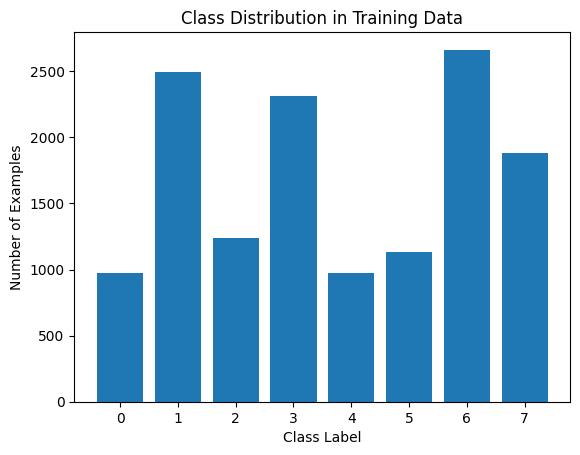

Class 0: 974 examples
Class 1: 2494 examples
Class 2: 1241 examples
Class 3: 2316 examples
Class 4: 971 examples
Class 5: 1136 examples
Class 6: 2663 examples
Class 7: 1878 examples
Sample Image Shapes: [(28, 28, 3), (28, 28, 3), (28, 28, 3), (28, 28, 3), (28, 28, 3)]
Sample Image Sizes: [(28, 28), (28, 28), (28, 28), (28, 28), (28, 28)]


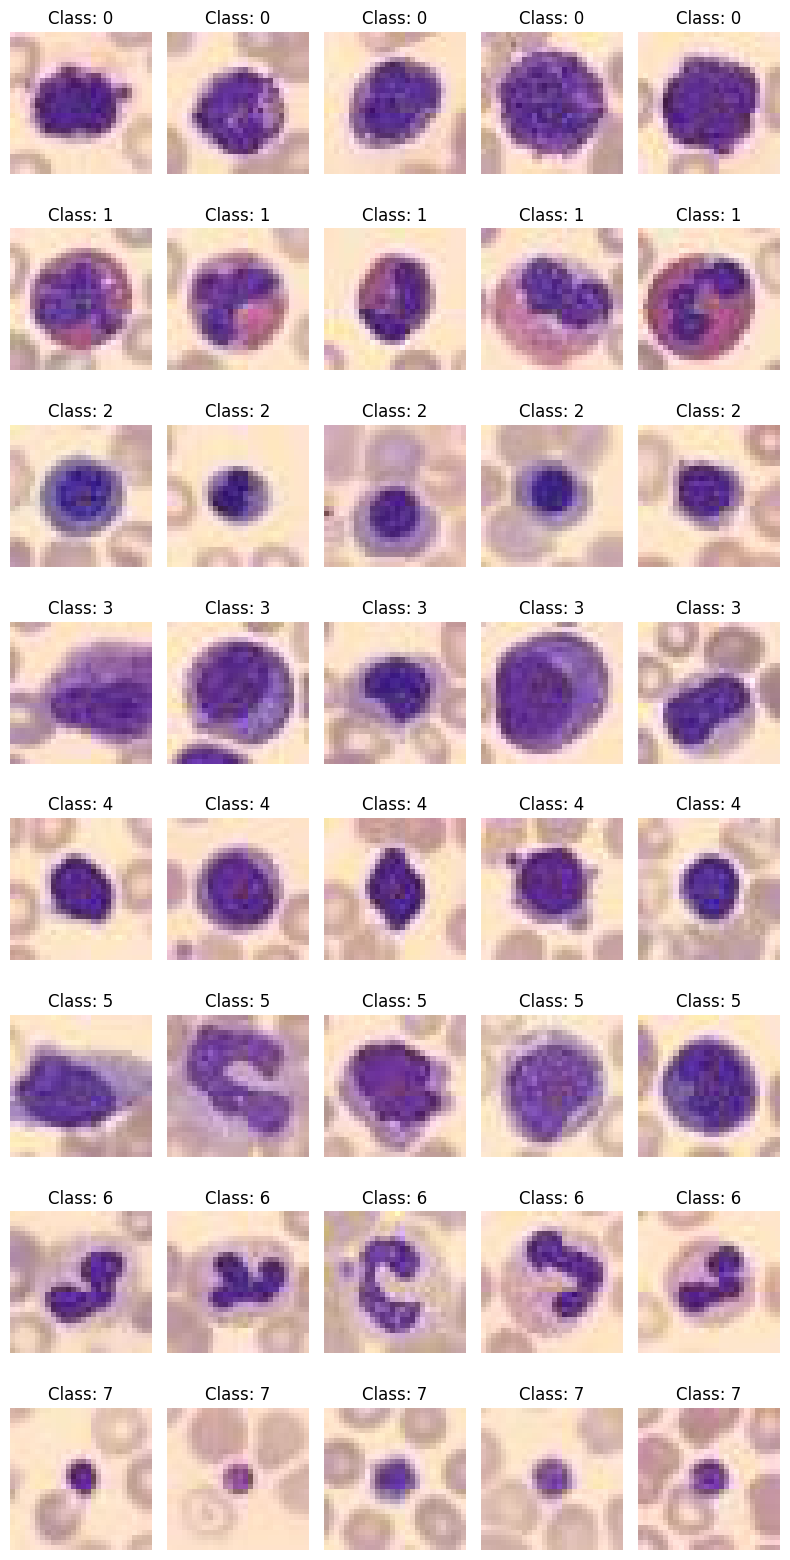

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Examples')
plt.title('Class Distribution in Training Data')
plt.show()

for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} examples")

image_shapes = [img.shape for img in X_train]
image_sizes = [(img.shape[0], img.shape[1]) for img in X_train]

print("Sample Image Shapes:", image_shapes[0:5])
print("Sample Image Sizes:", image_sizes[0:5])

num_rows = len(unique_classes)
num_cols = 5  # 三列


fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 16))

for i in range(num_rows):
    for j in range(num_cols):

        class_indices = np.where(y_train == unique_classes[i])[0]
        random_index = random.choice(class_indices)

        axes[i, j].imshow(X_train[random_index])
        axes[i, j].set_title(f'Class: {unique_classes[i]}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## Preprocessing

1. Turn all of image to gray scale.

In [ ]:
X_train_gray = []
for image in X_train:
    gray_image = Image.fromarray(image).convert('L')
    X_train_gray.append(np.array(gray_image))

X_train_gray = np.array(X_train_gray)

X_test_gray = []
for image in X_test:
    gray_image = Image.fromarray(image).convert('L')
    X_test_gray.append(np.array(gray_image))

X_test_gray = np.array(X_test_gray)

2. Normalization

In [ ]:
X_train_normalized = X_train_gray.astype('float32') / 255.0
print(X_train_normalized.shape)
X_train = X_train_normalized
print(X_train.shape)

X_test_normalized = X_test_gray.astype('float32') / 255.0
print(X_test_normalized.shape)

(13673, 28, 28)
(13673, 28, 28)
(3419, 28, 28)


3. Balancing the Dataset

In [ ]:
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# 创建RandomOverSampler实例
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# 对训练集进行过采样
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train)

# 打印平衡后的类别分布
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} examples")


Class 0: 2663 examples
Class 1: 2663 examples
Class 2: 2663 examples
Class 3: 2663 examples
Class 4: 2663 examples
Class 5: 2663 examples
Class 6: 2663 examples
Class 7: 2663 examples


In [ ]:
X_train = X_train_resampled.reshape(-1, 28, 28, 1)
X_test = X_test_flat.reshape(-1, 28, 28, 1)
y_train = y_train_resampled

Special Dataset for CNN: No gray scale

In [ ]:
X_train_norm = X_train_copy.astype('float32') / 255.0
X_test_norm = X_test_copy.astype('float32') / 255.0

X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here.

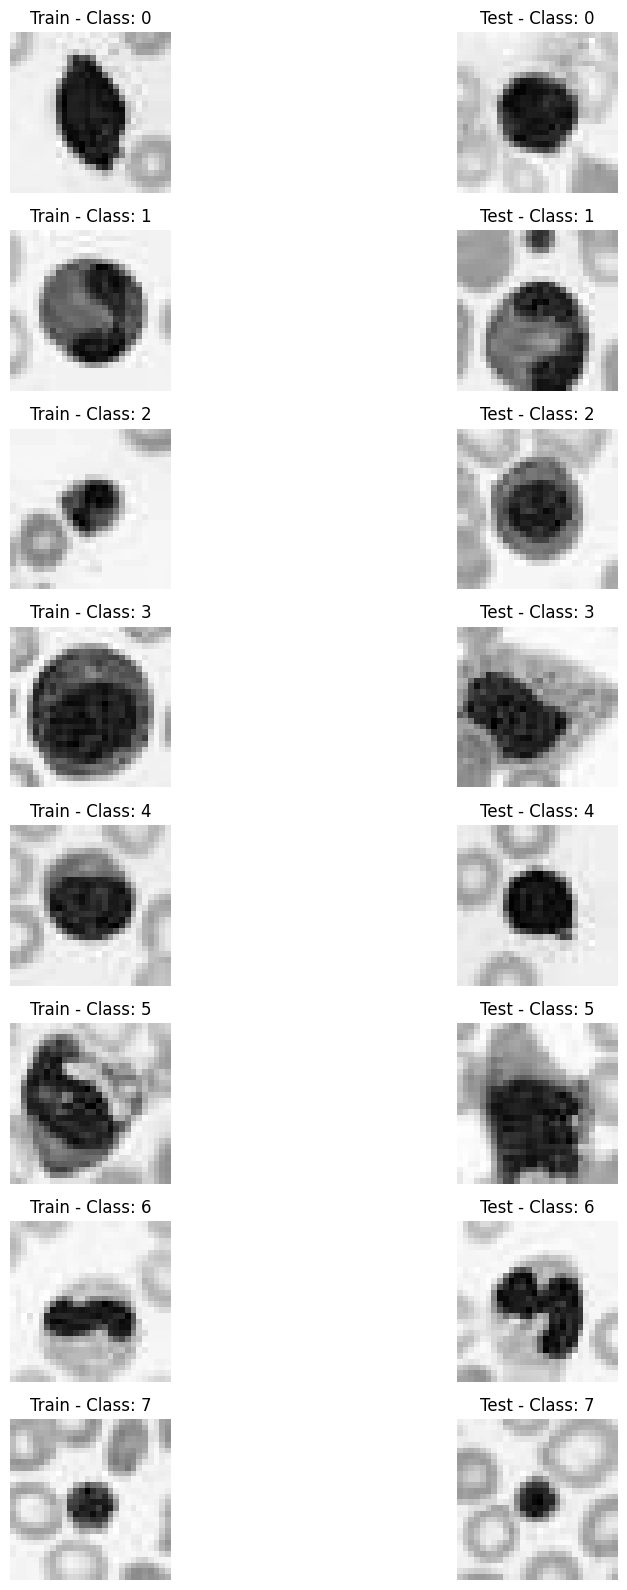

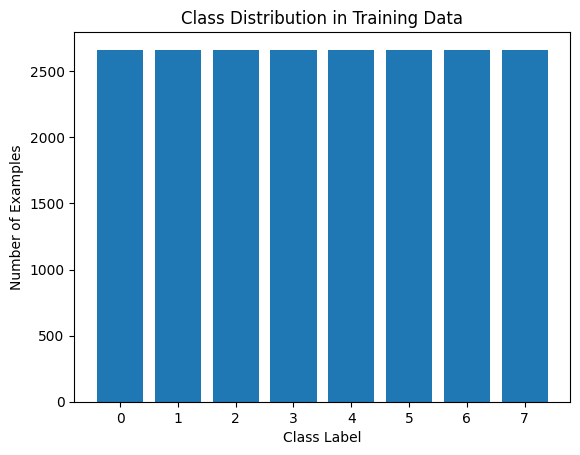

X_train: (21304, 28, 28, 1)
X_test: (3419, 28, 28, 1)
y_train: (21304,)


In [ ]:
# 创建一个子图网格，每行显示一个类别的图像
fig, axes = plt.subplots(len(unique_classes), 2, figsize=(12, 16))

# 循环遍历每个类别
for i, ax_row in enumerate(axes):
    class_indices_train = np.where(y_train == unique_classes[i])[0]
    class_indices_test = np.where(y_test == unique_classes[i])[0]

    # 随机选择一个训练集样本和一个测试集样本
    random_index_train = random.choice(class_indices_train)
    random_index_test = random.choice(class_indices_test)

    # 显示训练集样本
    ax_row[0].imshow(X_train[random_index_train], cmap='gray')
    ax_row[0].set_title(f'Train - Class: {unique_classes[i]}')
    ax_row[0].axis('off')

    # 显示测试集样本
    ax_row[1].imshow(X_test[random_index_test], cmap='gray')
    ax_row[1].set_title(f'Test - Class: {unique_classes[i]}')
    ax_row[1].axis('off')

plt.tight_layout()
plt.show()

unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Examples')
plt.title('Class Distribution in Training Data')
plt.show()

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

In [ ]:
#y_train_encoded = to_categorical(y_train, num_classes=10)
#y_test_encoded = to_categorical(y_test, num_classes=10)
#y_train = y_train_encoded
#y_test = y_test_encoded

# 将训练数据划分为新的训练数据和验证数据
#X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def MLP_model(batch_size=32, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    #model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='softmax'))

    # 根据传入的参数选择优化器和设置学习率
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer name")

    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model



Epoch 1/10
533/533 [==============================] - 1s 2ms/step - loss: 1.2309 - accuracy: 0.5381 - val_loss: 1.0517 - val_accuracy: 0.5909
Epoch 2/10
533/533 [==============================] - 1s 1ms/step - loss: 0.9620 - accuracy: 0.6427 - val_loss: 0.9245 - val_accuracy: 0.6574
Epoch 3/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8986 - accuracy: 0.6653 - val_loss: 0.8847 - val_accuracy: 0.6764
Epoch 4/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8621 - accuracy: 0.6804 - val_loss: 0.8808 - val_accuracy: 0.6682
Epoch 5/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8396 - accuracy: 0.6901 - val_loss: 0.8487 - val_accuracy: 0.6778
Epoch 6/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8080 - accuracy: 0.6991 - val_loss: 0.8873 - val_accuracy: 0.6778
Epoch 7/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7864 - accuracy: 0.7080 - val_loss: 0.8167 - val_accuracy: 0.7055
Epoch 

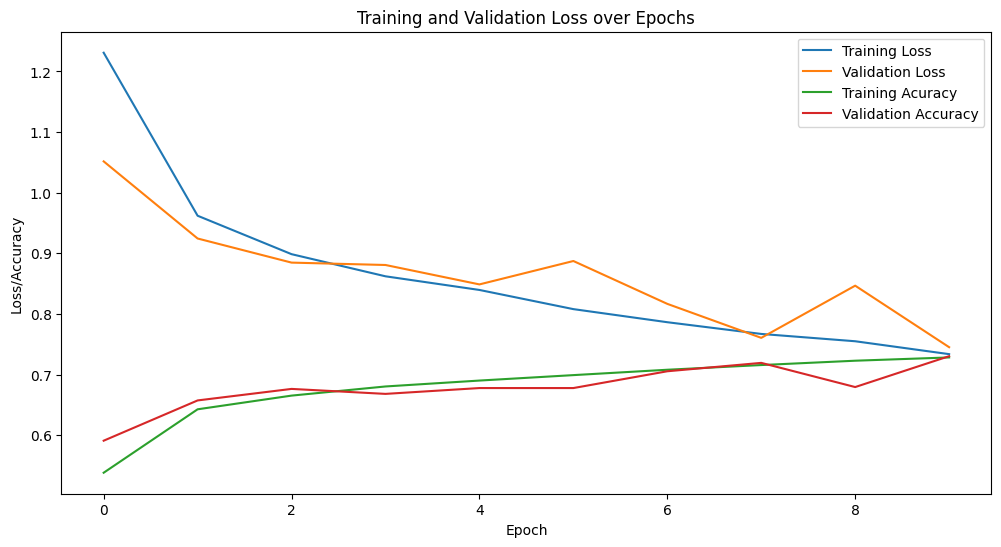

Epoch 1/10
533/533 [==============================] - 1s 2ms/step - loss: 1.1735 - accuracy: 0.5668 - val_loss: 0.9359 - val_accuracy: 0.6646
Epoch 2/10
533/533 [==============================] - 1s 2ms/step - loss: 0.9436 - accuracy: 0.6494 - val_loss: 0.9554 - val_accuracy: 0.6461
Epoch 3/10
533/533 [==============================] - 1s 2ms/step - loss: 0.8840 - accuracy: 0.6699 - val_loss: 0.8536 - val_accuracy: 0.6846
Epoch 4/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8579 - accuracy: 0.6791 - val_loss: 0.8171 - val_accuracy: 0.6902
Epoch 5/10
533/533 [==============================] - 1s 2ms/step - loss: 0.8316 - accuracy: 0.6925 - val_loss: 0.8265 - val_accuracy: 0.6872
Epoch 6/10
533/533 [==============================] - 1s 2ms/step - loss: 0.8126 - accuracy: 0.6998 - val_loss: 0.8386 - val_accuracy: 0.6827
Epoch 7/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8032 - accuracy: 0.7015 - val_loss: 0.7472 - val_accuracy: 0.7226
Epoch 

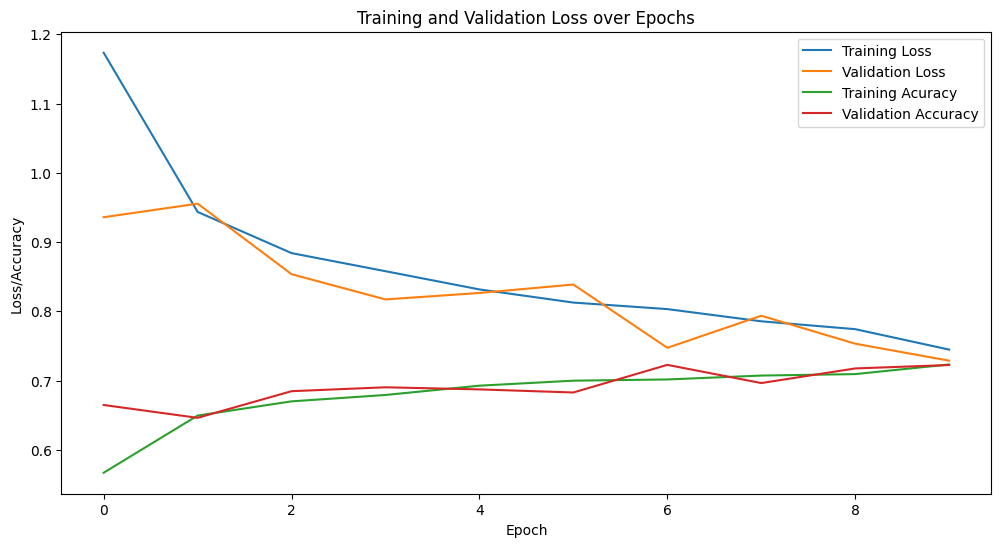

Epoch 1/10
533/533 [==============================] - 1s 2ms/step - loss: 1.1786 - accuracy: 0.5657 - val_loss: 1.0069 - val_accuracy: 0.6322
Epoch 2/10
533/533 [==============================] - 1s 2ms/step - loss: 0.9507 - accuracy: 0.6462 - val_loss: 0.9101 - val_accuracy: 0.6646
Epoch 3/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8852 - accuracy: 0.6711 - val_loss: 0.8238 - val_accuracy: 0.6951
Epoch 4/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8532 - accuracy: 0.6831 - val_loss: 0.8173 - val_accuracy: 0.6968
Epoch 5/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8304 - accuracy: 0.6914 - val_loss: 0.8424 - val_accuracy: 0.6855
Epoch 6/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7973 - accuracy: 0.7009 - val_loss: 0.7978 - val_accuracy: 0.7038
Epoch 7/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7783 - accuracy: 0.7104 - val_loss: 0.8523 - val_accuracy: 0.6811
Epoch 

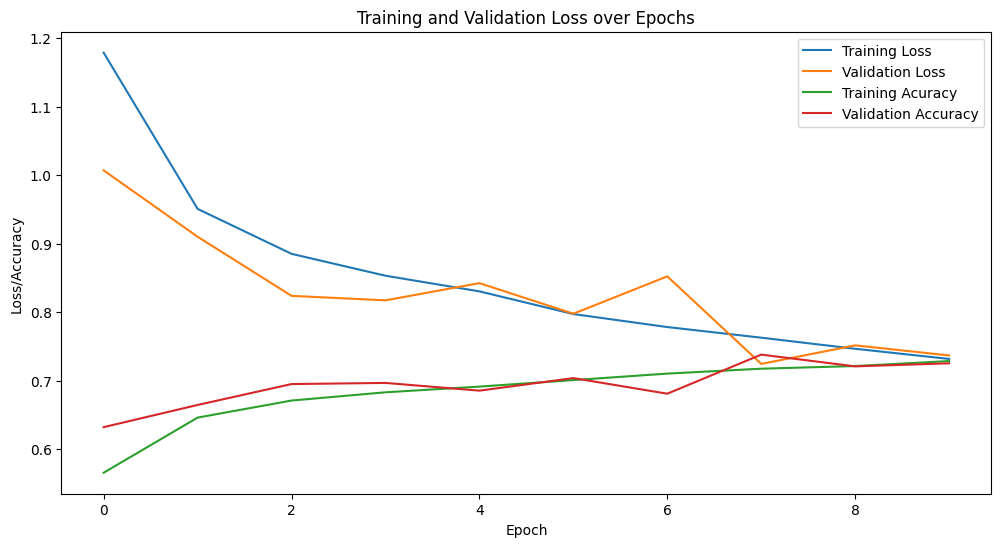

Epoch 1/10
533/533 [==============================] - 1s 2ms/step - loss: 1.2176 - accuracy: 0.5376 - val_loss: 0.9805 - val_accuracy: 0.6334
Epoch 2/10
533/533 [==============================] - 1s 1ms/step - loss: 0.9736 - accuracy: 0.6396 - val_loss: 0.9425 - val_accuracy: 0.6444
Epoch 3/10
533/533 [==============================] - 1s 1ms/step - loss: 0.9010 - accuracy: 0.6668 - val_loss: 0.9410 - val_accuracy: 0.6628
Epoch 4/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8555 - accuracy: 0.6823 - val_loss: 0.8875 - val_accuracy: 0.6754
Epoch 5/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8326 - accuracy: 0.6894 - val_loss: 0.7935 - val_accuracy: 0.7083
Epoch 6/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7992 - accuracy: 0.7038 - val_loss: 0.7713 - val_accuracy: 0.7092
Epoch 7/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7826 - accuracy: 0.7101 - val_loss: 0.7809 - val_accuracy: 0.7019
Epoch 

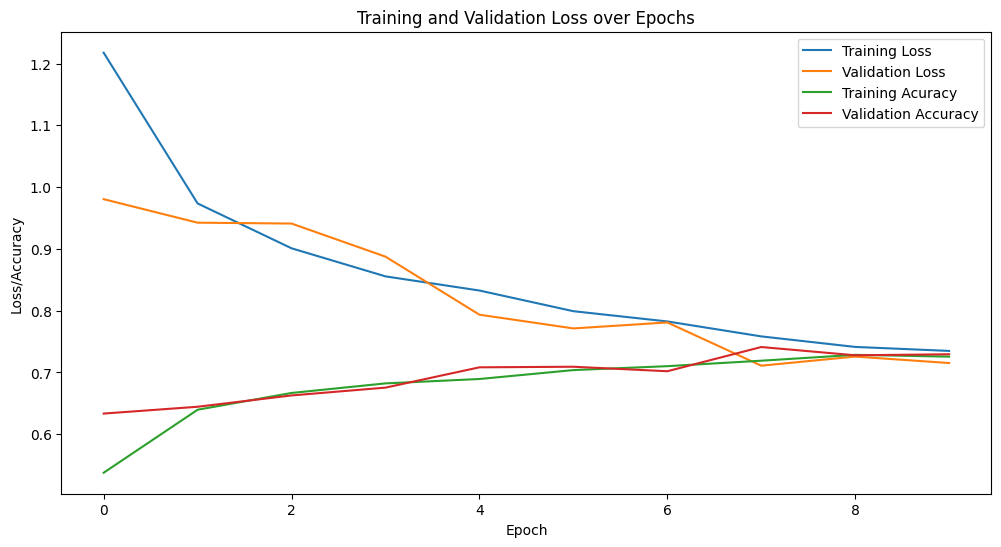

Epoch 1/10
533/533 [==============================] - 1s 2ms/step - loss: 1.1968 - accuracy: 0.5480 - val_loss: 0.9944 - val_accuracy: 0.6437
Epoch 2/10
533/533 [==============================] - 1s 1ms/step - loss: 0.9645 - accuracy: 0.6471 - val_loss: 0.9511 - val_accuracy: 0.6472
Epoch 3/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8988 - accuracy: 0.6676 - val_loss: 0.9082 - val_accuracy: 0.6610
Epoch 4/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8528 - accuracy: 0.6859 - val_loss: 0.8127 - val_accuracy: 0.6984
Epoch 5/10
533/533 [==============================] - 1s 1ms/step - loss: 0.8237 - accuracy: 0.6985 - val_loss: 0.8267 - val_accuracy: 0.6977
Epoch 6/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7981 - accuracy: 0.7034 - val_loss: 0.7742 - val_accuracy: 0.7195
Epoch 7/10
533/533 [==============================] - 1s 1ms/step - loss: 0.7768 - accuracy: 0.7131 - val_loss: 0.8721 - val_accuracy: 0.6770
Epoch 

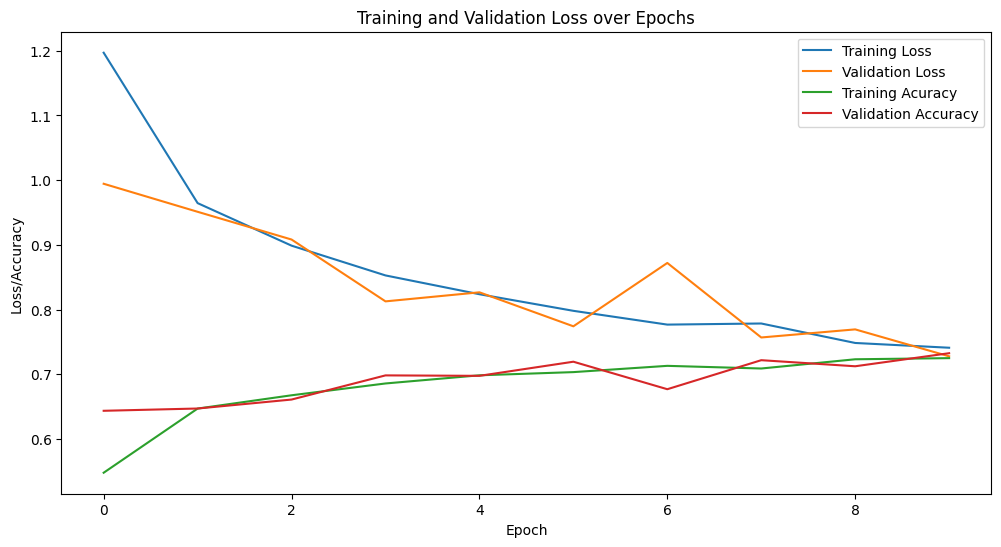

Mean Validation Accuracy: 0.7280
Mean Validation Loss: 0.7308
Total Run Time for K-fold Cross-Validation: 43.07 seconds


In [ ]:
# 创建K折交叉验证对象
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化一个列表来存储每个折的验证准确度和损失
val_accuracies = []
val_losses = []

 # 创建早停止回调
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 记录开始时间
start_time = time.time()

# 执行K折交叉验证
for train_indices, val_indices in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    # 创建和编译模型
    model = MLP_model()

    # 训练模型
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # 评估模型并存储验证准确度
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Acuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()


# 记录结束时间
end_time = time.time()

# 计算K折交叉验证的总运行时间
total_run_time = end_time - start_time

# 计算平均准确度和平均损失
mean_val_accuracy = np.mean(val_accuracies)
mean_val_loss = np.mean(val_losses)

# 输出交叉验证的平均准确度和平均损失
print(f"Mean Validation Accuracy: {mean_val_accuracy:.4f}")
print(f"Mean Validation Loss: {mean_val_loss:.4f}")

#Print total run time
print(f"Total Run Time for K-fold Cross-Validation: {total_run_time:.2f} seconds")


## Model 2 - Convolutional Neural Network

In [ ]:
def CNNmodel(learning_rate=0.001, optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = CNNmodel()

In [ ]:
num_epochs = 10
y_train_one_hot = to_categorical(y_train_copy, 8)
y_test_one_hot = to_categorical(y_test_copy, 8)

start_time = time.time()
model.fit(X_train_norm, y_train_one_hot, epochs=num_epochs, batch_size=32)

end_time = time.time()
total_run_time = end_time - start_time

Epoch 1/10
428/428 [==============================] - 5s 10ms/step - loss: 0.9114 - accuracy: 0.6796
Epoch 2/10
428/428 [==============================] - 5s 12ms/step - loss: 0.5860 - accuracy: 0.7946
Epoch 3/10
428/428 [==============================] - 7s 17ms/step - loss: 0.4641 - accuracy: 0.8384
Epoch 4/10
428/428 [==============================] - 6s 13ms/step - loss: 0.3918 - accuracy: 0.8587
Epoch 5/10
428/428 [==============================] - 4s 11ms/step - loss: 0.3359 - accuracy: 0.8816
Epoch 6/10
428/428 [==============================] - 4s 10ms/step - loss: 0.3029 - accuracy: 0.8950
Epoch 7/10
428/428 [==============================] - 4s 10ms/step - loss: 0.2767 - accuracy: 0.9035
Epoch 8/10
428/428 [==============================] - 5s 11ms/step - loss: 0.2531 - accuracy: 0.9097
Epoch 9/10
428/428 [==============================] - 4s 10ms/step - loss: 0.2370 - accuracy: 0.9180
Epoch 10/10
428/428 [==============================] - 4s 10ms/step - loss: 0.2170 - accura

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_one_hot)
print(f'Test accuracy: {test_accuracy}')

107/107 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.9149
Test accuracy: 0.9148873686790466


## Model 3 - Algorithm Choice 1

Grid Search Time: 20.041614055633545 seconds
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Validation Accuracy: 0.8357193147148557
Test Accuracy: 0.6700789704591986


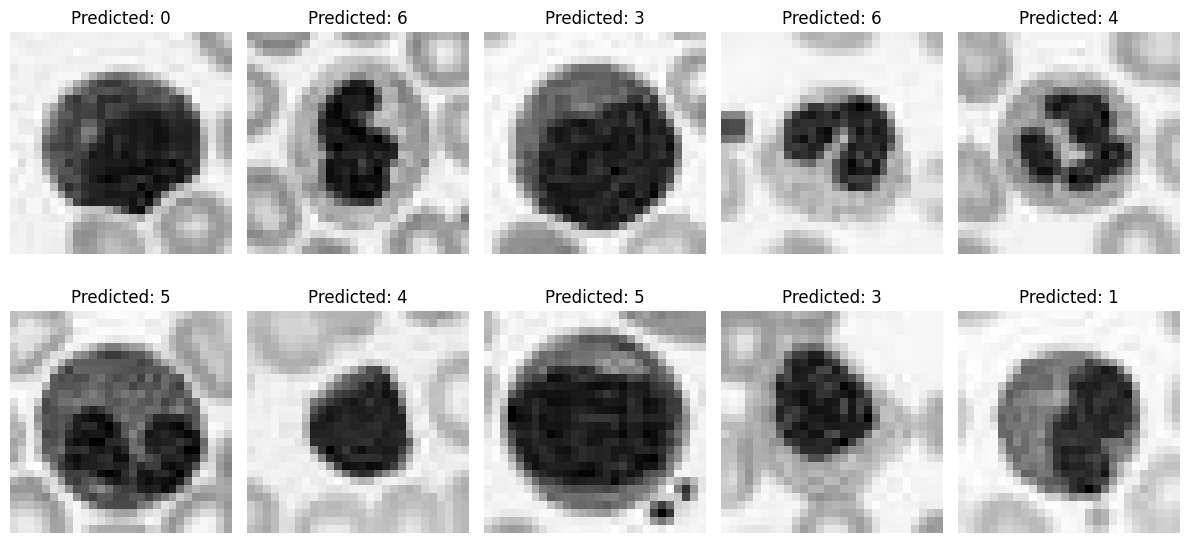

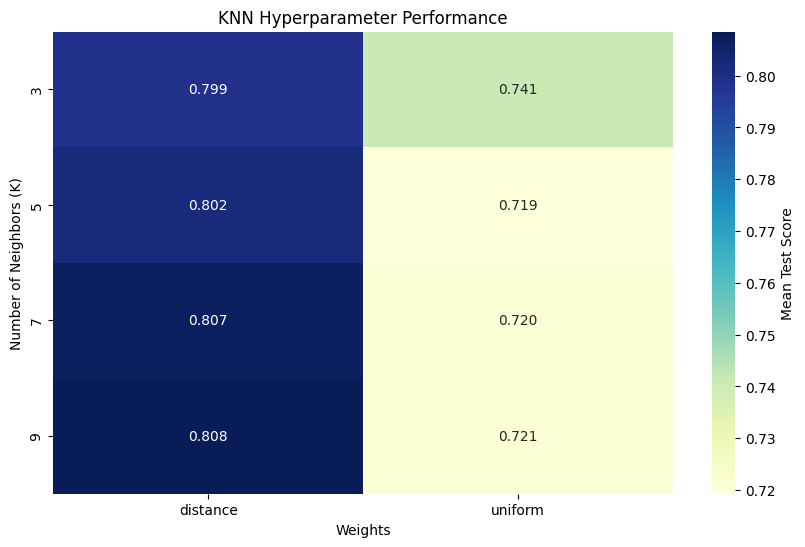

In [ ]:
# 1. 拆分数据集
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 2. 创建KNN模型
knn_model = KNeighborsClassifier()

# 在训练模型之前，将X_train展平为二维特征矩阵
X_train_flat = X_train_s.reshape(X_train_s.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# 3. 超参数调优
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # 不同的K值
    'weights': ['uniform', 'distance'],  # 权重选项
}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# 计时开始
start_time = time.time()
grid_search.fit(X_train_flat, y_train_s)
# 计算运行时间
end_time = time.time()
elapsed_time = end_time - start_time
print("Grid Search Time:", elapsed_time, "seconds")

# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)

# 4. 训练和评估模型
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train_flat, y_train_s)
val_accuracy = best_knn_model.score(X_val_flat, y_val)
print("Validation Accuracy:", val_accuracy)

results1 = {}
# 5. 最终测试
X_test_flat = X_test.reshape(X_test.shape[0], -1)

test_accuracy = best_knn_model.score(X_test_flat, y_test)

print("Test Accuracy:", test_accuracy)


# 可视化一些样本
num_samples_to_visualize = 10
sample_indices = random.sample(range(X_test.shape[0]), num_samples_to_visualize)

plt.figure(figsize=(12, 6))
for i, sample_index in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {best_knn_model.predict(X_test_flat[sample_index].reshape(1, -1))[0]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

results = pd.DataFrame(grid_search.cv_results_)

# 3.1 选择你想展示的信息
# 这里我们选择mean_test_score, param_n_neighbors, 和 param_weights
results = results[['param_n_neighbors', 'param_weights', 'mean_test_score']]

# 3.2 将结果转换为适合可视化的格式
results = results.pivot(index='param_n_neighbors', columns='param_weights', values='mean_test_score')

# 3.3 使用seaborn创建热力图
plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Mean Test Score'})
plt.title('KNN Hyperparameter Performance')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors (K)')
plt.show()

## Model 4 - Random Forest

In [ ]:
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state = 42)
RFmodel.fit(X_train_flat, y_train_copy)
y_pred = RFmodel.predict(X_test_flat)

accuracy = accuracy_score(y_test_copy, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8338695525007312


# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

Best Batch Size:  64
Best Optimizer:  adam
Best Learning Rate:  0.001
Total Run Time : 371.52 seconds
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.958001      0.161995         0.280333        0.021013   
1       6.267696      0.572969         0.280001        0.014765   
2       6.384174      0.274844         0.294333        0.021684   
3       5.913668      0.029892         0.268334        0.002494   
4       5.884562      0.090368         0.281334        0.016540   

  param_batch_size param_learning_rate param_optimizer  \
0               32               0.001            adam   
1               32               0.001             sgd   
2               32               0.001         rmsprop   
3               32                0.01            adam   
4               32                0.01             sgd   

                                              params  split0_test_score  \
0  {'batch_size': 32, 'learning_rate': 0.001, 'op...           0.673754

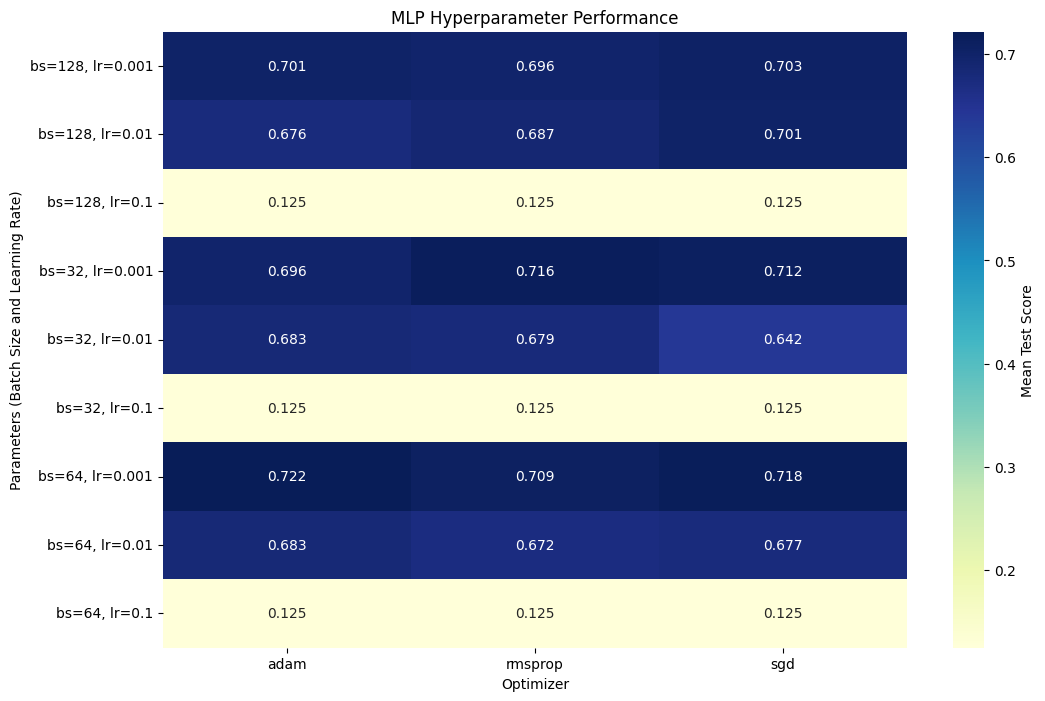

In [ ]:
# 定义要搜索的超参数空间
param_grid = {
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# 记录开始时间
start_time = time.time()

# 创建KerasClassifier
MLP_grid_model = KerasClassifier(model=MLP_model, epochs=10, verbose=0, learning_rate=0.001)

# 执行Grid Search
grid = GridSearchCV(estimator=MLP_grid_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# 输出最佳超参数组合
print("Best Batch Size: ", grid_result.best_params_['batch_size'])
print("Best Optimizer: ", grid_result.best_params_['optimizer'])
print("Best Learning Rate: ", grid_result.best_params_['learning_rate'])

# 记录结束时间
end_time = time.time()

# 计算总运行时间
total_time = end_time - start_time

#Print total run time
print(f"Total Run Time : {total_time:.2f} seconds")

# 1. 获取训练结果
results = pd.DataFrame(grid_result.cv_results_)

print(results.head())

# 2.1 选择你想展示的信息
# 这里我们选择mean_test_score, param_batch_size, param_optimizer, 和 param_learning_rate
results = results[['param_batch_size', 'param_optimizer', 'param_learning_rate', 'mean_test_score']]

# 2.2 处理数据
# 转换batch_size和learning_rate为整数，以便于可视化
results['param_batch_size'] = results['param_batch_size'].astype(int)
results['param_learning_rate'] = results['param_learning_rate'].astype(float)

# 2.3 创建一个额外的列来存储所有参数的组合
results['params'] = results.apply(lambda row: f"bs={row['param_batch_size']}, lr={row['param_learning_rate']}", axis=1)

# 3. 创建热力图
plt.figure(figsize=(12, 8))
heatmap_data = results.pivot(index='params', columns='param_optimizer', values='mean_test_score')
ax = sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Mean Test Score'})
ax.set_title('MLP Hyperparameter Performance')
ax.set_xlabel('Optimizer')
ax.set_ylabel('Parameters (Batch Size and Learning Rate)')
plt.show()

## Model 2 - Convolutional Neural Network

In [ ]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [16, 32, 64]
}

model = KerasClassifier(model=CNNmodel, learning_rate=0.1, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_result = grid.fit(X_test_norm, y_test_one_hot)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
accuracy = accuracy_score(y_test_copy, y_pred)
print("Best Accuracy on Test Data:", accuracy)

best_params = grid_search_1.best_params_
print("Best Parameters:", best_params)

## Model 3 - Algorithm Choice 1

Hyperparameters tuning for this already done in the last part of model 3

## Model 4 - Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search_2 = GridSearchCV(RFmodel, param_grid, cv=5, scoring='accuracy')

grid_search_2.fit(X_train_flat, y_train_copy)

In [ ]:
accuracy = accuracy_score(y_test_copy, y_pred)
print("Best Accuracy on Test Data:", accuracy)

best_params = grid_search_2.best_params_
print("Best Parameters:", best_params)

# Final Models

## Model 1 - Fully Connected Neural Network

In [ ]:
def Final_MLP_model(batch_size=32, optimizer='rmsprop', learning_rate=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    #model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='softmax'))

    # 根据传入的参数选择优化器和设置学习率
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer name")

    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

## Model 2 - Convolutional Neural Network

In [ ]:
def Final_CNNmodel(batch_size=32, learning_rate=0.001, optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Model 3 - Algorithm Choice 1

In [ ]:
def final_knn_model(n_neighbors=9, weights='distance', algorithm='auto', p=2):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    return knn

## Model 4 - Algorithm Choice 2

In [ ]:
def Final_RF_model():
    RFmodel = RandomForestClassifier(n_estimators=100, max_depth=none, min_samples_split=2, random_state = 42)
    return RFmodel